# Genre Classification using Deep Learning techniques
The data set consists on 1000 audio tracks of 30 sec each. 10 genres are considered with 100 tracks for each genre. The files are monophonic tracks of 16bits and sample rate of 22050Hz en .wav format. 


### Load data


#### Download data
The First step in the process will be to load the data we are going to be using to train and test the model.

In [ ]:
# Download data
dataroot = "dataroot/"
!mkdir dataroot 
!wget -P dataroot http://opihi.cs.uvic.ca/sound/genres.tar.gz

mkdir: cannot create directory ‘dataroot’: File exists
--2022-09-15 02:16:09--  http://opihi.cs.uvic.ca/sound/genres.tar.gz
Resolving opihi.cs.uvic.ca (opihi.cs.uvic.ca)... 142.104.68.135
Connecting to opihi.cs.uvic.ca (opihi.cs.uvic.ca)|142.104.68.135|:80... failed: Connection timed out.
Retrying.

--2022-09-15 02:18:20--  (try: 2)  http://opihi.cs.uvic.ca/sound/genres.tar.gz
Connecting to opihi.cs.uvic.ca (opihi.cs.uvic.ca)|142.104.68.135|:80... failed: Connection timed out.
Retrying.

--2022-09-15 02:20:32--  (try: 3)  http://opihi.cs.uvic.ca/sound/genres.tar.gz
Connecting to opihi.cs.uvic.ca (opihi.cs.uvic.ca)|142.104.68.135|:80... failed: Connection timed out.
Retrying.

--2022-09-15 02:22:44--  (try: 4)  http://opihi.cs.uvic.ca/sound/genres.tar.gz
Connecting to opihi.cs.uvic.ca (opihi.cs.uvic.ca)|142.104.68.135|:80... failed: Connection timed out.
Retrying.

--2022-09-15 02:25:01--  (try: 5)  http://opihi.cs.uvic.ca/sound/genres.tar.gz
Connecting to opihi.cs.uvic.ca (opihi.cs.uvi

In [ ]:
# Unzip data
import tarfile
with tarfile.open(dataroot+"genres.tar.gz","r:gz") as tar_ref:
    tar_ref.extractall(dataroot)
    tar_ref.close()

In [ ]:
import os
from os import listdir
from os.path import isfile, join

#Eliminate extra files
mypath = "dataroot/genres"

onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

for i in onlyfiles:
  if os.path.exists(mypath+"/"+i):
    os.remove(mypath+"/"+i)
  else:
    print("The file does not exist")

#### Obtain MFCC Spectograms
The second step is to obtain the MFCCs from the raw audio data.
The MFCCs will be vectors for each frame we define within an audio track. These vectors will be concatenated in order to create a spectrogram. 
The objective is to create these spectrograms that can be interpreted as images in greyscale or with a singular channel, which is the same for our purpose. Once, the audio has been represented by an image by means of theses spectrograms, it can be fed into a Deep convolutional Network.

Note: MFCC or Mel-Frequncy Cepstrum Coefficients are a well-known feature in audio processing. Basically, they refer to the coefficients of the inverse Fourier transfer of the log spectrum of the original data. [MFCCs](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum).



In [ ]:
import os
import math
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd



DATASET_PATH = "dataroot"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

#FRAME_SIZE = 1024
HOP_LENGTH = 512


def get_mfcc(dataset_path, num_mfcc=13, n_fft=2048,hop_length=512, num_segments=5):
    """Extracts MFCCs from music dataset and saves them into a json file along witgh genre labels.
        :param: dataset_path (str): Path to dataset
        :param: num_mfcc (int): Number of coefficients to extract
        :param: n_fft (int): Interval we consider to apply FFT. Measured in # of samples
        :param: hop_length (int): Sliding window for FFT. Measured in # of samples
        :param: num_segments (int): Number of segments we want to divide sample tracks into
        :return:
        """

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:

	            	# load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
                
                #data["labels"].append(i-1)

                 # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-2)
                        print("{}, segment:{}".format(file_path, d+1))

    return data

In [ ]:
DATA_DICT = get_mfcc(DATASET_PATH, hop_length=HOP_LENGTH)

X = np.array(DATA_DICT["mfcc"])
Y = np.array(DATA_DICT["labels"])

Streaming output truncated to the last 5000 lines.
dataroot/genres/jazz/jazz.00023.wav, segment:2
dataroot/genres/jazz/jazz.00023.wav, segment:3
dataroot/genres/jazz/jazz.00023.wav, segment:4
dataroot/genres/jazz/jazz.00023.wav, segment:5
dataroot/genres/jazz/jazz.00035.wav, segment:1
dataroot/genres/jazz/jazz.00035.wav, segment:2
dataroot/genres/jazz/jazz.00035.wav, segment:3
dataroot/genres/jazz/jazz.00035.wav, segment:4
dataroot/genres/jazz/jazz.00035.wav, segment:5
dataroot/genres/jazz/jazz.00044.wav, segment:1
dataroot/genres/jazz/jazz.00044.wav, segment:2
dataroot/genres/jazz/jazz.00044.wav, segment:3
dataroot/genres/jazz/jazz.00044.wav, segment:4
dataroot/genres/jazz/jazz.00044.wav, segment:5
dataroot/genres/jazz/jazz.00091.wav, segment:1
dataroot/genres/jazz/jazz.00091.wav, segment:2
dataroot/genres/jazz/jazz.00091.wav, segment:3
dataroot/genres/jazz/jazz.00091.wav, segment:4
dataroot/genres/jazz/jazz.00091.wav, segment:5
dataroot/genres/jazz/jazz.00025.wav, segment:1
dataroot/

In [ ]:
X = np.array(DATA_DICT["mfcc"])
Y = np.array(DATA_DICT["labels"])

### Deep Convolutional Network

In this case, the Mel-spectogram is reshaped as a greyscale image that is fed into a Deep Convolutional Network. This is because CNN are based on convolutional layer that originally were design to extract features from images by training the weigths of the kernels or filters. These filters try to find local patters in the image by considering the neighbourhood to a given value or pixel.
Making an analogy for audio, this local patterns can refer to patterns in frequency and time. CNN applied to audio are able to preserve time and frequency correlations.

[REF_1_CNN](https://colah.github.io/posts/2014-07-Conv-Nets-Modular/)

[REF_2_CNN](https://arxiv.org/abs/1709.04396)

[REF_3_CNN](https://arxiv.org/abs/1905.00078)

#### Split Data into Train, Validation and Test Sets

These step is crucial. It is needed to generate three sets from the entire data.

* Train set is going to be use to train the model.

* Validation set is important to evaluate the model during the training process to avoid overfitting of the model to the training data, i.e, it loss its generalization capacity.

* Test set is utilized to evaluate the final model with new data that the model has never seen before.

In [ ]:
#Split data into train, validation and test sets
from sklearn.model_selection import train_test_split

def train_val_test_split(input_data, labels, test_size=0.2, val_size=0.2):
  
  # Load data
  
  # Create the train/test split
  X_train, X_test, y_train, y_test = train_test_split(input_data, labels, test_size = test_size)
  # Create the train/val split
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = val_size)
  # Reshape 2D arrays to 3D arrays for Deep Learning models:
  """
  first dimension: nro of steps considered
  second dimension: nro of mfcc considered in each snapshot
  third dimension: depth or nro of channels
  """
  X_train = X_train[..., np.newaxis]
  X_val   = X_val[..., np.newaxis]
  X_test  = X_test[..., np.newaxis]

  return X_train, X_val, X_test, y_train, y_val, y_test



X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split (X,Y,0.25,0.25)

#### Build the model

The model will be made based on:

* [Convolutional layers](https://keras.io/api/layers/convolution_layers/convolution2d/): This layers applies the filters.
* [MaxPool layers](https://keras.io/api/layers/pooling_layers/max_pooling2d/) : This layers reduce the size of intermediate representation of data.
* [BatchNormalization layers](https://keras.io/api/layers/normalization_layers/batch_normalization/): This layers are useful to speed the training process according to Keras Documentation.

After the feature extraction stage, a Flatten layer is needed to reshape the data to fed it into a Dense layer, which will be the final classifier based on the features extracted during the previous stage. A  [Dropout](https://en.wikipedia.org/wiki/Dilution_(neural_networks)) layer is added to avoid overfitting and finally a layer with a softmax activation function is used to make the final prediction.

In [ ]:
#Built model
import tensorflow.keras as kr 

def build_model(input_shape, output_shape):

  model = kr.Sequential()

  # ---------------- 1st conv layer ---------------- 
  model.add(kr.layers.Conv2D(
      filters = 32,
      kernel_size = (3,3),
      activation = 'relu',
      input_shape = input_shape

  ))
  model.add(kr.layers.MaxPool2D(
      pool_size = (3,3),
      strides   = (2,2),
      padding = 'same'
  ))
  #normalization is a process used to speed the training process and get more reliable final models.
  model.add(kr.layers.BatchNormalization())

  # ---------------- 2nd conv layer ---------------- 
  model.add(kr.layers.Conv2D(
      filters = 32,
      kernel_size = (3,3),
      activation = 'relu'
  ))
  model.add(kr.layers.MaxPool2D(
      pool_size = (3,3),
      strides   = (2,2),
      padding = 'same'
  ))
  model.add(kr.layers.BatchNormalization())

  #  ---------------- 3rd conv layer ---------------- 
  model.add(kr.layers.Conv2D(
        filters = 32,
        kernel_size = (2,2),
        activation = 'relu'
    ))
  model.add(kr.layers.MaxPool2D(
        pool_size = (3,3),
        strides   = (2,2),
        padding = 'same'
    ))
  model.add(kr.layers.BatchNormalization())
  # flatten the output to feed the full connected network
  model.add(kr.layers.Flatten())
  model.add(kr.layers.Dense(
      units               = 64,
      activation          = 'relu',
      use_bias            =True,
      kernel_initializer  ='glorot_uniform',
      bias_initializer    ='zeros', 
      kernel_regularizer  =None,
      bias_regularizer    =None,
      activity_regularizer=None,
      kernel_constraint   =None,
      bias_constraint     =None, 
    ))
  #Add dropout in order to avoid potential overfitting
  model.add(kr.layers.Dropout(0.3))

  # Output layer
  
  model.add(kr.layers.Dense(
      units               = output_shape, #we need as much outputs as genre class
      activation          = 'softmax',
  ))
  return  model

input_shape = (X_train.shape[1],X_train.shape[2], X_train.shape[3])
CNN_model = build_model(input_shape, 10)

#### Compile and Train the model

To compile the model, it is needed to define a couple of parameters that are going to be used to define the optimization and loss function:

* [Optimizer](https://keras.io/api/optimizers/) : Adam is going to be utilized as it is computationally efficient, and is well suited for problems that are large in terms of data.
* [Loss](https://keras.io/api/losses/) : Cross Entropy is an appropiate choice for classification problems.
* [Metric](https://keras.io/api/metrics/)

In [ ]:
# Compile the model
lr = 0.0001 #learning rate parameter
optimizer = kr.optimizers.Adam(learning_rate=lr) 
CNN_model.compile(
    optimizer = optimizer,
    loss      = "sparse_categorical_crossentropy",
    metrics   = ['accuracy']
)

In [ ]:
# Train the model
history = CNN_model.fit(X_train, 
                        y_train,
                        validation_data = (X_val, y_val),
                        batch_size = 32,
                        epochs = 20)

Epoch 1/20
88/88 [==============================] - 12s 126ms/step - loss: 2.4078 - accuracy: 0.2373 - val_loss: 2.2280 - val_accuracy: 0.2455
Epoch 2/20
88/88 [==============================] - 11s 121ms/step - loss: 1.8815 - accuracy: 0.3646 - val_loss: 1.7572 - val_accuracy: 0.4130
Epoch 3/20
88/88 [==============================] - 11s 122ms/step - loss: 1.6457 - accuracy: 0.4315 - val_loss: 1.5689 - val_accuracy: 0.4536
Epoch 4/20
88/88 [==============================] - 11s 121ms/step - loss: 1.4860 - accuracy: 0.4817 - val_loss: 1.4883 - val_accuracy: 0.4824
Epoch 5/20
88/88 [==============================] - 11s 121ms/step - loss: 1.4110 - accuracy: 0.5016 - val_loss: 1.3791 - val_accuracy: 0.5219
Epoch 6/20
88/88 [==============================] - 11s 122ms/step - loss: 1.3114 - accuracy: 0.5358 - val_loss: 1.3086 - val_accuracy: 0.5368
Epoch 7/20
88/88 [==============================] - 11s 122ms/step - loss: 1.2550 - accuracy: 0.5550 - val_loss: 1.2752 - val_accuracy: 0.5475

In [ ]:
#Show train process
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """
    plt.figure(figsize=(10, 10))
    fig, axs = plt.subplots(2)
    
    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="validation accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="validation error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

<Figure size 720x720 with 0 Axes>

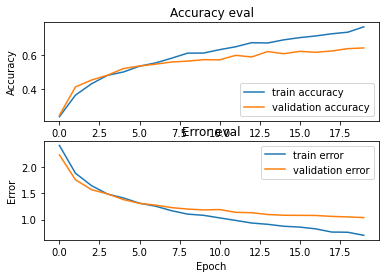

In [ ]:
  plot_history(history)

It can be appreciated that as we get closer to 20 epochs the validation error starts to flatten out, that is a signal to stop the training process and avoid overfitting.

#### Evaluation and Prediction

In [ ]:
# Evaluate the model

test_error, test_accuracy = CNN_model.evaluate(X_test, y_test, verbose = 1)

print('\nTest accuracy:', test_accuracy)

40/40 [==============================] - 1s 23ms/step - loss: 1.0653 - accuracy: 0.6240

Test accuracy: 0.6240000128746033


An accuracy around 62% is obtained by this model. Efforts will be made to overcome this performance measurement with the following models.

In [ ]:
# Make a prediction with the model

def prediction(model, X, y):
    """Predict a single sample using the trained model
    :param model: Trained classifier
    :param X: Input data
    :param y (int): Target
    :return 
    """

    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value from the output layer of the model
    predicted_index = np.argmax(prediction, axis=1)

    predicted_genre = DATA_DICT["mapping"][predicted_index[0]]
    #print("Target: {}, Predicted label: {}".format(y, predicted_index))
    print("Target: {}, Predicted label: {}".format(DATA_DICT["mapping"][y], predicted_genre))

In [ ]:
X_to_predict = X_test[21]
y_to_predict = y_test[21]

# predict sample
prediction(CNN_model, X_to_predict, y_to_predict)

Target: rock, Predicted label: rock


## RNN

Another alternative is to consider audio and music as a time serie of consecutive samples of a signal (an audio signal in this case). Therefore, a suitable architecture for this kind of data is RNN or Recursive Neural Networks. RNN use previous samples or data to predict the next sample.




NOTE: Some of the main drawbacks of RNN are that they are considerably slower to train. And that they are not so good at modeling Long time relations, that's why, RNN are commonly implemented using LSTM:


##### LSTM
Long short term memory emerged like an improvement to RNN in order to deal with longer time relations or patterns in the input data.


[GRU](https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be)

[LSTM](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)

[LSTM for audio](https://qmro.qmul.ac.uk/xmlui/handle/123456789/24946)



#### Split data into train, validation and test sets

In this case, no reshaping is needed as RNN models are supposed to accept time-series data.

In [ ]:
#Split data into train, validation and test sets
from sklearn.model_selection import train_test_split

def train_val_test_split_RNN(input_data, labels, test_size=0.2, val_size=0.2):
  
  # Load data
  
  # Create the train/test split
  X_train, X_test, y_train, y_test = train_test_split(input_data, labels, test_size = test_size)
  # Create the train/val split
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = val_size)
 
  return X_train, X_val, X_test, y_train, y_val, y_test



X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split_RNN(X,Y,0.25,0.25)

#### Build the model

The architecture shares the classifier of the previous model, however, the feature extraction stage has changed. 

Two LSTM layers are going to be used to extrar time recorrelations/patterns in data. The layers are set to work as sequence to sequence, i.e, a sequence is taken as input and the  predicted sequence is the output. The sequence-to-value alternative could be employed is the RNN layer would the the output layer of the model, as the output value would be the resulting/predicted class. In the proposed architecture, the LSTM works as a feature extractor and the classification is made by a feed-forward network (Dense layers). 

In [ ]:
#Build RNN model
import tensorflow.keras as kr 

def build_RNN_model(input_shape, output_shape):

  model = kr.Sequential()

  # ---------------- 1st LSTM layer ---------------- 
  model.add(kr.layers.LSTM(
      units=64,
      input_shape=input_shape,
      return_sequences=True)
  )
  # ---------------- 2nd LSTM layer ---------------- 
  model.add(kr.layers.LSTM(
      units=64)
  )

  # ---------------- Dense layer ---------------- 
  model.add(kr.layers.Dense(
      units               = 64,
      activation          = 'relu',
      use_bias            =True,
      kernel_initializer  ='glorot_uniform',
      bias_initializer    ='zeros', 
      kernel_regularizer  =None,
      bias_regularizer    =None,
      activity_regularizer=None,
      kernel_constraint   =None,
      bias_constraint     =None, 
    ))
  # ---------------- Dropout layer ---------------- 
  #Add dropout in order to avoid potential overfitting
  model.add(kr.layers.Dropout(0.3))

  # ---------------- Output layer ---------------- 
  
  model.add(kr.layers.Dense(
      units               = output_shape, #we need as much outputs as genre class
      activation          = 'softmax',
  ))
  return  model

input_shape = (X_train.shape[1],X_train.shape[2])
RNN_model = build_RNN_model(input_shape, 10)

#### Compile and Train the model

In [ ]:
# Compile the model
lr = 0.0001 #learning rate parameter
optimizer = kr.optimizers.Adam(learning_rate=lr)
RNN_model.compile(
    optimizer = optimizer,
    loss      = "sparse_categorical_crossentropy",
    metrics   = ['accuracy']
)

In [ ]:
# Train the model
history = RNN_model.fit(X_train, 
                        y_train,
                        validation_data = (X_val, y_val),
                        batch_size = 32,
                        epochs = 30)

Epoch 1/30
88/88 [==============================] - 32s 316ms/step - loss: 2.2758 - accuracy: 0.1391 - val_loss: 2.2095 - val_accuracy: 0.2497
Epoch 2/30
88/88 [==============================] - 26s 299ms/step - loss: 2.1599 - accuracy: 0.2494 - val_loss: 2.0849 - val_accuracy: 0.3063
Epoch 3/30
88/88 [==============================] - 29s 335ms/step - loss: 2.0266 - accuracy: 0.3027 - val_loss: 1.9448 - val_accuracy: 0.3479
Epoch 4/30
88/88 [==============================] - 26s 300ms/step - loss: 1.9141 - accuracy: 0.3493 - val_loss: 1.8352 - val_accuracy: 0.3778
Epoch 5/30
88/88 [==============================] - 30s 341ms/step - loss: 1.8058 - accuracy: 0.3803 - val_loss: 1.7424 - val_accuracy: 0.3991
Epoch 6/30
88/88 [==============================] - 33s 379ms/step - loss: 1.7313 - accuracy: 0.4006 - val_loss: 1.6633 - val_accuracy: 0.4216
Epoch 7/30
88/88 [==============================] - 35s 394ms/step - loss: 1.6510 - accuracy: 0.4162 - val_loss: 1.6036 - val_accuracy: 0.4301

<Figure size 720x720 with 0 Axes>

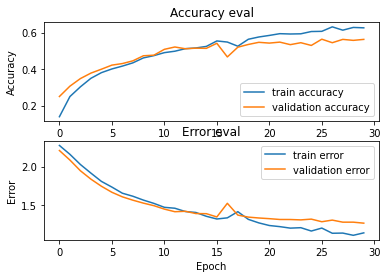

In [ ]:
  plot_history(history)

From the above results, RNN-LSTM model could not overcome the CNN model performance. However, these two models can work together. An CRNN architecture is proposed in the following section.

## COMBINE RNN and CNN models (CRNN)

The main idea behind this concept is to perform a two stage feature extraction process:

* Convolutional stage: In this stage, audio feature extraction is performed based on filters and kernels looking for local patterns in the data. Here, the imporant aspects are two:
  * CNN represets local patterns and combine them to detect more complex structures by looking over wider contexts and preserving spatiality in time and frequency.
  * Non-linear subsampling layers are used to provide translational
invariance to the model and reduce the size of intermediate representations

* RNN stage: The recurrent layers are employed to summarise information over time and perfom time-series prediction.



#### Split data into train, validation and test sets

As the first stage refers to Convolutional layers, reshaping input data is needed because greyscale image format is expected by the layers.

In [ ]:
#Split data into train, validation and test sets
#We can use the method defined for CNN model because, the input layers will be convolutional layers and the output still refers to classification problem
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split (X,Y,0.25,0.25)

NameError: ignored

#### Build CRNN model

The Architecture is basically a concatenation of the previous proposals. Two main aspects are highlighted about how the model is developed:

* In convolutional layers, the padding is set to 'same' in order to track the size of the intermediate data as the final data shape needs to be flatten or reshape to be fed as input to the RNN stage ( which is expecting a time-serie kind input)

* A Reshape + Dense layer is employed to adapt the output of the CNN stage(image) to the input of the RNN stage(time-serie).


In [ ]:
#Build CRNN model
import tensorflow.keras as kr 

def build_CRNN_model(input_shape, output_shape):

  model = kr.Sequential()

  # ---------------- 1st conv layer ---------------- 
  model.add(kr.layers.Conv2D(
      filters     = 64,
      kernel_size = (3,3),
      padding     ='same',
      activation = 'relu',
      input_shape = input_shape

  )) # (259,13,64)
  model.add(kr.layers.MaxPool2D(
      pool_size = (3,3),
      #strides   = (2,2),
      #padding = 'same'
  )) #(86,4,64)
  #normalization is a process used to speed the training process and get more reliable final models.
  model.add(kr.layers.BatchNormalization())

  # ---------------- 2nd conv layer ---------------- 
  model.add(kr.layers.Conv2D(
      filters = 128,
      kernel_size = (3,3),
      padding     ='same',
      activation = 'relu'
  )) #(86,4,64)
  model.add(kr.layers.MaxPool2D(
      pool_size = (2,2),
      #strides   = (2,2),
      #padding = 'same'
  )) #(43,2,64)
  model.add(kr.layers.BatchNormalization())

  #  ---------------- 3rd conv layer ---------------- 
  model.add(kr.layers.Conv2D(
        filters = 256,
        kernel_size = (2,2),
        padding     ='same',
        activation = 'relu'
    ))
  model.add(kr.layers.BatchNormalization())
  model.add(kr.layers.Conv2D(
        filters = 512,
        kernel_size = (2,2),
        padding     ='same',
        activation = 'relu'
    )) #(43,2,512)
  model.add(kr.layers.BatchNormalization())
  
  # Rashape to Connect CNN stage with RNN stage
  model.add(kr.layers.Reshape(
      target_shape = ((43,1024))
  )) #(43,1024)

  model.add(kr.layers.Dense(
      units               = 64,
      activation          = 'relu',
      use_bias            =True,
      kernel_initializer  ='glorot_uniform',
      bias_initializer    ='zeros', 
      kernel_regularizer  =None,
      bias_regularizer    =None,
      activity_regularizer=None,
      kernel_constraint   =None,
      bias_constraint     =None, 
    )) #(43,64)

  # ---------------- 1st LSTM layer ---------------- 
  model.add(kr.layers.LSTM(
      units=64,
      input_shape=input_shape,
      return_sequences=True)
  )
  # ---------------- 2nd LSTM layer ---------------- 
  model.add(kr.layers.LSTM(
      units=64)
  )

  model.add(kr.layers.BatchNormalization())

  
  # ---------------- Dense layer ---------------- 
  model.add(kr.layers.Dense(
      units               = 64,
      activation          = 'relu',
      use_bias            =True,
      kernel_initializer  ='glorot_uniform',
      bias_initializer    ='zeros', 
      kernel_regularizer  =None,
      bias_regularizer    =None,
      activity_regularizer=None,
      kernel_constraint   =None,
      bias_constraint     =None, 
    ))
  # ---------------- Dropout layer ---------------- 
  #Add dropout in order to avoid potential overfitting
  model.add(kr.layers.Dropout(0.3))

  # ---------------- Output layer ---------------- 
  
  model.add(kr.layers.Dense(
      units               = output_shape, #we need as much outputs as genre class
      activation          = 'softmax',
  ))
  return  model

  
input_shape = (X_train.shape[1],X_train.shape[2], X_train.shape[3])

In [ ]:
input_shape = (X_train.shape[1],X_train.shape[2], X_train.shape[3])
CRNN_model = build_CRNN_model(input_shape, 10)

#### Compile and Train model

In [ ]:
# Compile the model
lr = 0.0001 #learning rate parameter
optimizer = kr.optimizers.Adam(learning_rate=lr)
CRNN_model.compile(
    optimizer = optimizer,
    loss      = "sparse_categorical_crossentropy",
    metrics   = ['accuracy']
)

In [ ]:
# Train the model
history = CRNN_model.fit(X_train, 
                        y_train,
                        validation_data = (X_val, y_val),
                        batch_size = 32,
                        epochs = 20)

Epoch 1/20
88/88 [==============================] - 67s 706ms/step - loss: 1.8550 - accuracy: 0.3718 - val_loss: 2.2263 - val_accuracy: 0.2412
Epoch 2/20
88/88 [==============================] - 55s 625ms/step - loss: 1.4580 - accuracy: 0.5034 - val_loss: 2.0132 - val_accuracy: 0.3714
Epoch 3/20
88/88 [==============================] - 56s 636ms/step - loss: 1.2887 - accuracy: 0.5567 - val_loss: 1.6819 - val_accuracy: 0.5048
Epoch 4/20
88/88 [==============================] - 55s 623ms/step - loss: 1.1618 - accuracy: 0.6112 - val_loss: 1.3217 - val_accuracy: 0.6169
Epoch 5/20
88/88 [==============================] - 55s 621ms/step - loss: 1.0383 - accuracy: 0.6596 - val_loss: 1.1661 - val_accuracy: 0.6179
Epoch 6/20
88/88 [==============================] - 55s 621ms/step - loss: 0.9180 - accuracy: 0.7001 - val_loss: 1.0810 - val_accuracy: 0.6521
Epoch 7/20
88/88 [==============================] - 54s 618ms/step - loss: 0.8763 - accuracy: 0.7193 - val_loss: 0.9770 - val_accuracy: 0.6724

<Figure size 720x720 with 0 Axes>

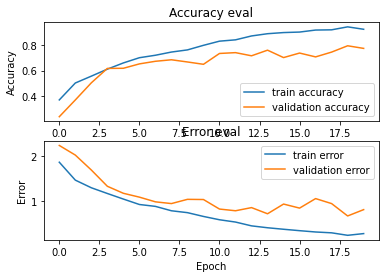

In [ ]:
plot_history(history)

Even considering fewer epochs than in the RNN-LSTM model and stopping training before validation error stabilises, the performance of the model has improved.

#### Evaluate the model

In [ ]:
# Evaluate the model

test_error, test_accuracy = CRNN_model.evaluate(X_test, y_test, verbose = 1)

print('\nTest accuracy:', test_accuracy)

40/40 [==============================] - 8s 198ms/step - loss: 0.7639 - accuracy: 0.7608

Test accuracy: 0.7608000040054321


According to what was stated above, the performance of the model is considerably superior to the previous proposals as a 14% accuracy improvement is made in comparison to the CNN model and more than 20% compared to the RNN-LSTM model.